# Putting it all together: Simulating Rotational Spectra

In the previous notebooks you have written a series of pieces of Python code to:  
- calculate the rotational energy levels for a rigid rotor,
- apply the specific selection rule to identify allowed and disallowed transitions,
- calculate the change in energy (and associated frequency) for allowed transitions,
- calculate the factors affecting the relative intensities of spectral lines.

In this, final, notebook, you will combine all of these pieces of code into a complete sequence of code that can simulate the rotational spectrum of a rigid rotor.

<div class="alert alert-success"> 
<h2>Assessment</h2>

When you have finished the exercise, save this completed notebook, using **File > Save and Checkpoint** in the Jupyter menu. Then upload your notebook for assessment using Moodle. Please make sure that you upload the `Putting it all together.ipynb` file, and that it is not an old version of the notebook (check the modification date and time before you upload).

Because your notebook will be marked by running your code, you should check that everything works as you expect when running from top to bottom. Because notebook cells can be run in any order, it is possible to have code that looks correct, but that gives errors when run by someone else. 

Before uploading your notebook, you can test it by selecting **Kernel > Restart & Run All** from the Jupyter menu.
<div/>

In [1]:
# first, import the various pieces your code relies on.
import numpy as np
from scipy.constants import h, k
from math import sqrt, pi
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

<div class="alert alert-success"> 
Complete each of the functions below, by copying your working code from the respective previous notebooks.
</div>

In [2]:
def reduced_mass( m1, m2 ):
    return (m1*m2)/(m1+m2)

In [3]:
def moment_of_inertia( mu, r ):
    return mu*(r**2)

In [4]:
rotational_prefactor = h**2/(8*(pi**2))

def rotational_constant( moment_of_inertia ):
    return rotational_prefactor/moment_of_inertia

In [5]:
def rotational_energy( j, rotational_constant ):
    return rotational_constant*j*(j+1)

In [6]:
def transition_energy( j1, j2, rotational_constant ):
    energy_1 = rotational_energy( j1, rotational_constant )
    energy_2 = rotational_energy( j2, rotational_constant )
    return energy_2 - energy_1

In [7]:
def transition_probability( j_initial, j_final ):
    if j_final - j_initial == 1:
        return 1.0
    elif j_final - j_initial == -1:
        return 1.0
    else:
        return 0

In [8]:
def degeneracy( j ):
    return 2*j + 1

In [9]:
def boltzmann( j, rotational_constant, temperature ):
    return (2*j+1)*np.exp*(-(rotational_constant*j*(j+1))/k*temperature)

In [10]:
def intensity( j, rotational_constant, temperature ):
    return ((h*rotational_constant)/(k*temperature))*((2*j)+1)*np.exp(-rotational_energy(j, rotational_constant)/(k*temperature))

<div class="alert alert-success"> 
The code below provides the skeleton for combining each of the functions you have written in the previous cells, to give your complete computational model. As a starting point, the molecular parameters for HCl are provided. The main part of the code will look familiar from the <a href='Calculating Rotational Transition Energies.ipynb'>Calculating Rotational Transition Energies</a> notebook, but with <i>frequencies</i> stored for each allowed transition, rather than <i>energies</i>. Remember that the frequency for a transition is related to the energy change via $E=h\nu$. In addition to storing the frequency for each allowed transition, you will also need to store the intensities, to model the complete spectrum shape. When plotting your spectrum, convert your frequencies into GHz, and label your axes appropriately.
</div>

In [11]:
# atomic masses and interatomic distance for an HCl molecule
m_H = 1.66e-27 # kg
m_Cl = 5.81e-26 # kg
r_HCl = 1.29e-10 # m

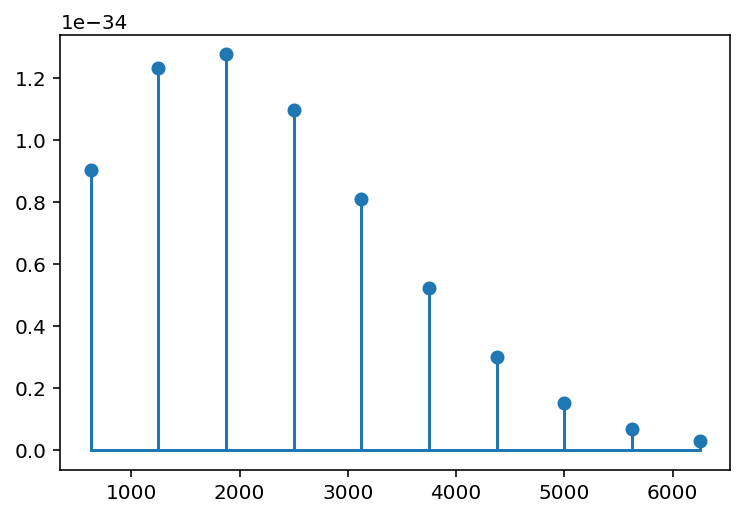

In [12]:
frequencies_in_GHz = []
intensities = []
max_j = 11
temperature = 298.0 # Kelvin

mu = reduced_mass( m_H, m_Cl )
I = moment_of_inertia( mu, r_HCl )
B = rotational_constant( I )

for j_initial in range(0,max_j):
    for j_final in range(j_initial+1,max_j): # only consider absorption J'' > J'
        if transition_probability( j_initial, j_final ) == 1: # check that the transition is allowed
            frequencies_in_GHz.append( transition_energy( j_initial, j_final, B)/ (h*1e9) )
            intensities.append( intensity( j_final, B, temperature) )

plt.stem( frequencies_in_GHz, intensities, basefmt='-' )
plt.show()

## 1. Modelling the effect of temperature

<div class="alert alert-success"> 
Use your code to simulate the spectrum for the first 20 lines in the rotational absorption spectrum of HCl at  
a) 100 K,  
b) 298 K, and  
c) 1000 K.
</div>

For each simulated spectrum, plot the spectral shape using

```python
plt.stem( frequencies_in_GHz, intensities, basefmt='-' )
plt.plot( frequencies_in_GHz, intensities, '--', label=temperature )
```

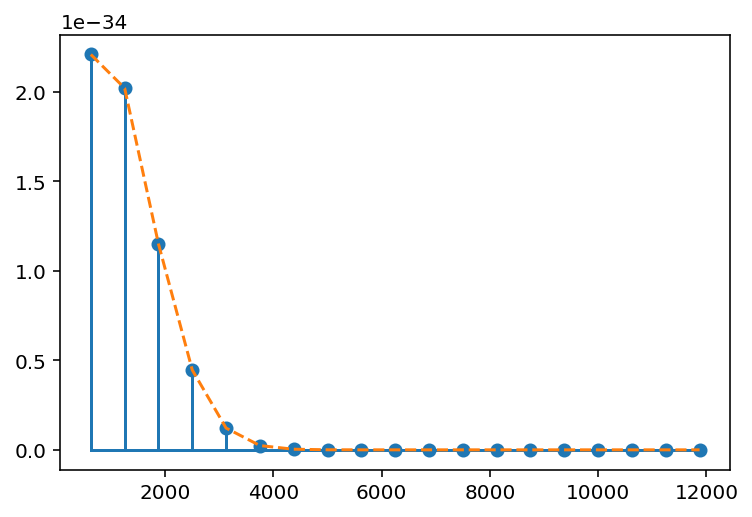

In [13]:
frequencies_in_GHz = []
intensities = []
max_j = 20
temperature = 100 # Kelvin

mu = reduced_mass( m_H, m_Cl )
I = moment_of_inertia( mu, r_HCl )
B = rotational_constant( I )

for j_initial in range(0,max_j):
    for j_final in range(j_initial+1,max_j): # only consider absorption J'' > J'
        if transition_probability( j_initial, j_final ) == 1: # check that the transition is allowed
            frequencies_in_GHz.append( transition_energy( j_initial, j_final, B)/ (h*1e9) )
            intensities.append( intensity( j_final, B, temperature) )

plt.stem( frequencies_in_GHz, intensities, basefmt='-' )
plt.plot( frequencies_in_GHz, intensities, '--', label=temperature )
plt.show()

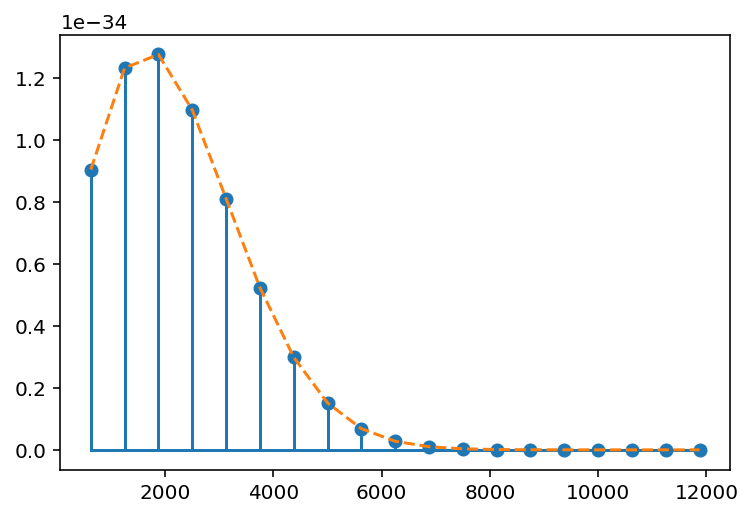

In [14]:
frequencies_in_GHz = []
intensities = []
max_j = 20
temperature = 298# Kelvin

mu = reduced_mass( m_H, m_Cl )
I = moment_of_inertia( mu, r_HCl )
B = rotational_constant( I )

for j_initial in range(0,max_j):
    for j_final in range(j_initial+1,max_j): # only consider absorption J'' > J'
        if transition_probability( j_initial, j_final ) == 1: # check that the transition is allowed
            frequencies_in_GHz.append( transition_energy( j_initial, j_final, B)/ (h*1e9) )
            intensities.append( intensity( j_final, B, temperature) )

plt.stem( frequencies_in_GHz, intensities, basefmt='-' )
plt.plot( frequencies_in_GHz, intensities, '--', label=temperature )
plt.show()

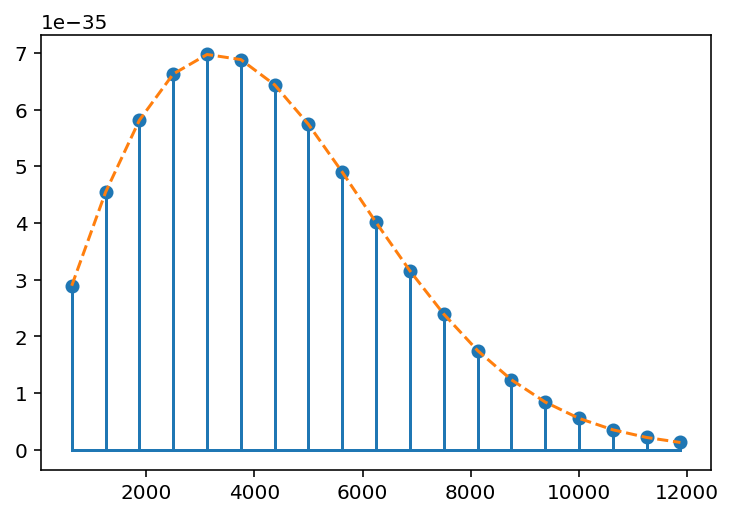

In [15]:
frequencies_in_GHz = []
intensities = []
max_j = 20
temperature = 1000# Kelvin

mu = reduced_mass( m_H, m_Cl )
I = moment_of_inertia( mu, r_HCl )
B = rotational_constant( I )

for j_initial in range(0,max_j):
    for j_final in range(j_initial+1,max_j): # only consider absorption J'' > J'
        if transition_probability( j_initial, j_final ) == 1: # check that the transition is allowed
            frequencies_in_GHz.append( transition_energy( j_initial, j_final, B)/ (h*1e9) )
            intensities.append( intensity( j_final, B, temperature) )

plt.stem( frequencies_in_GHz, intensities, basefmt='-' )
plt.plot( frequencies_in_GHz, intensities, '--', label=temperature )
plt.show()

## 2. Rotational Raman Spectroscopy

Throughout this exercise you have considered rotational absorption spectroscopy, where a photon with energy $\Delta E$ promotes an electron from state $J^\prime$ to $J^{\prime\prime}$. For a rigid rotot, the specific selection rule is $\Delta J=\pm1$, and absorption spectra correspond to transitions of electrons being excited one rotational energy level. For a molecule to be active under rotational absorption (or emission) spectroscopy, it must have a dipole. Non-dipolar molecules, such as H<sub>2</sub> (homodiatomic), CO<sub>2</sub> (symmetic linear) are therefore observable by  rotational absorption spectroscopy. The origin of the specific selection rule, $\Delta J=\pm1$ is conservation of angular momentum. A photon has a angular momentum (spin) of $\pm$1. If a molecular absorbs (or emits) one photon the angular momentum of the molecule must change by 1, to account for the lost (or gained) spin.

Raman spectroscopy does not involve absorption of a photon. Instead, the incident photon is **scattered** by the molecule, and consequently Raman has different gross and specific selection rules. For rotational Raman spectroscopy, the gross selection rule is that there has to be anisotropy (directional dependance) in the polarizability of a molecule. This means that for homodiatomic molecules and symmetric linear molecules, like H<sub>2</sub> and CO<sub>2</sub> a rotational Raman spectrum is observed.

<img src='figures/Raman_gross_selection_rule.png' width=600>

Because Raman is a scattering technique, Raman scattered photons are observed regardless of the wavelength of incident light, we can consider that the molecule is excited to a &ldquo;virtual level&rdquo; before relaxing to a &ldquo;real&rdquo; rotational energy level. Because we can consider this transition as being composed of &ldquo;two photons&rdquo;; one incident to the molecule and the other excident, this gives a specific selection rule in the case of rotational Raman of $\Delta J = 0, \pm2$.

<img src='figures/Raman_transitions.png' width=400>

In cases where the selection rule $\Delta J = 0$ is obeyed, the energy of the incident and excident photon is unchanged ($\Delta E = 0$), this is referred to as elastic or Rayleigh scattering.

If we look at how each of these transitions would appear on a spectrum then we observe the following.

<img src='figures/Raman_spectrum.png' width=500>

Lines that occur when $\Delta J = +2$ are referred to as **Stokes** lines, and those that occur when $\Delta J = -2$ are referred to as **anti-Stokes** lines. Due to thermal effects the Stokes lines are usually of higher intensity than anti-Stokes lines.

Please note that this is a sketch.

In the case of rotational energy levels, the energy of each level is given by:

\begin{equation}
E = BJ(J+1)
\end{equation}

Therefore for the transitions in rotational Raman where $\Delta J = \pm2$ the energy of those transitions, $\Delta E$ is given by:

\begin{equation}
\Delta E = E_{J+2} - E_J
\end{equation}

Substituting in the energies of these levels as given above:
\begin{equation}
\Delta E = B(J+2)(J+3)-BJ(J+1)
\end{equation}

Rearranging gives:
\begin{equation}
\Delta E = B ((J^2 + 5J + 6) - (J^2+J))
\end{equation}

\begin{equation}
\Delta E = 2B (2J + 3).
\end{equation} 

[Raman Reference](http://pubs.acs.org/doi/pdf/10.1021/ed052p568)

<div class="alert alert-success"> 
By adapting your code from above, model the Raman spectrum for C<sup>12</sup>O<sup>16</sup> at 298 K, with your $x$ axis showing frequencies relative to the Rayleigh line. Remember to include both the <b>Stokes</b> branch ($\Delta J=+2$) and the <b>anti-Stokes</b> branch ($\Delta J=-1$). You are given the relevant atomic masses and bond length for CO.
</div>

In [16]:
def transition_probability_raman( j_initial, j_final ):
    if j_final - j_initial == +2.0:
        return (2.0)
    elif j_final - j_initial == -2.0:
        return (-2.0)
    else:
        return( 0 )
    

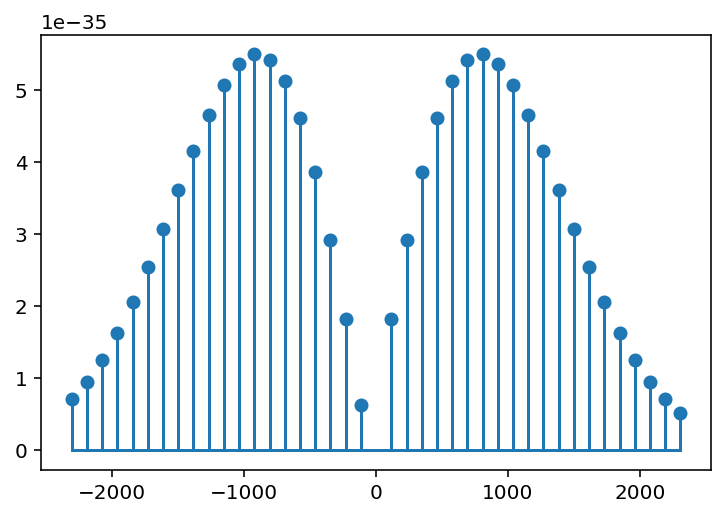

In [17]:
from scipy.constants import Avogadro
r_CO = 1.13e-10 # CO bond length in m
m_C = 12 / Avogadro * 1e-3 # mass of C^12 in kg
m_O = 16 / Avogadro * 1e-3 # mass of O^12 in kg

frequencies_in_GHz = []
intensities = []
max_j = 21
temperature = 298 # Kelvin

mu = reduced_mass(m_C, m_O)
I = moment_of_inertia(mu, r_CO)
B = rotational_constant( I )

for j_initial in range(0,max_j):
    for j_final in range(0, max_j): 
        if transition_probability( j_initial, j_final ) == 1: 
            frequencies_in_GHz.append( transition_energy( j_initial, j_final, B)/ (h*1e9) )
            intensities.append( intensity( j_final, B, temperature) )
    

plt.stem( frequencies_in_GHz, intensities, basefmt='-' )

plt.show()
        
            
           

